# Multi-Layer Perceptron Lab

In this lab, we will compare the performance of multi-layer perceptrons programmed via our various implementations. This contribution was completed during the Spring 2023 semester as part of our machine learning coursework.
Contributors:
1. Mohamed Elrefaiy
2. Leonel Varvelo

# Preliminary Data Citation
Source: https://www.kaggle.com/muonneutrino/us-census-demographic-data/data?select=acs2017_census_tract_data.csv
Origin: The data here are taken from the DP03 and DP05 tables of the 2015 American Community Survey 5-year estimates

# 1 Load, split, and balance
## 1.1 Load the data
For various parts of this lab we have used Dr. Larsons notebooks 7&8 for code [1](https://github.com/eclarson/MachineLearningNotebooks/tree/master/PDF_Slides)

In [4]:
import numpy as np
import pandas as pd
import os

In [5]:
df = pd.read_csv(f"{os.getcwd()}/acs2017_census_tract_data.csv")

In [6]:
print(df.shape)
df.head()

(74001, 37)


,TractId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001020100,Alabama,Autauga County,1845,899,946,2.4,86.3,5.2,0.0,...,0.5,0.0,2.1,24.5,881,74.2,21.2,4.5,0.0,4.6
1,1001020200,Alabama,Autauga County,2172,1167,1005,1.1,41.6,54.5,0.0,...,0.0,0.5,0.0,22.2,852,75.9,15.0,9.0,0.0,3.4
2,1001020300,Alabama,Autauga County,3385,1533,1852,8.0,61.4,26.5,0.6,...,1.0,0.8,1.5,23.1,1482,73.3,21.1,4.8,0.7,4.7
3,1001020400,Alabama,Autauga County,4267,2001,2266,9.6,80.3,7.1,0.5,...,1.5,2.9,2.1,25.9,1849,75.8,19.7,4.5,0.0,6.1
4,1001020500,Alabama,Autauga County,9965,5054,4911,0.9,77.5,16.4,0.0,...,0.8,0.3,0.7,21.0,4787,71.4,24.1,4.5,0.0,2.3


## 1.2 Remove missing data

In [7]:
# missing data
df[df.isna().any(axis=1)]

,TractId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
43,1003990000,Alabama,Baldwin County,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
106,1015981901,Alabama,Calhoun County,8,4,4,0.0,100.0,0.0,0.0,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
107,1015981902,Alabama,Calhoun County,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
108,1015981903,Alabama,Calhoun County,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
805,1097003605,Alabama,Mobile County,757,208,549,2.9,66.4,25.1,0.0,...,37.4,1.2,14.6,13.7,260,79.2,11.9,4.2,4.6,16.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73926,72137990000,Puerto Rico,Toa Baja Municipio,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
73957,72143990000,Puerto Rico,Vega Alta Municipio,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
73971,72145990000,Puerto Rico,Vega Baja Municipio,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
73974,72147990000,Puerto Rico,Vieques Municipio,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN


In [8]:
df = df.dropna(axis=0)
print(df.shape)
df.isna().any()

(72718, 37)


TractId             False
State               False
County              False
TotalPop            False
Men                 False
Women               False
Hispanic            False
White               False
Black               False
Native              False
Asian               False
Pacific             False
VotingAgeCitizen    False
Income              False
IncomeErr           False
IncomePerCap        False
IncomePerCapErr     False
Poverty             False
ChildPoverty        False
Professional        False
Service             False
Office              False
Construction        False
Production          False
Drive               False
Carpool             False
Transit             False
Walk                False
OtherTransp         False
WorkAtHome          False
MeanCommute         False
Employed            False
PrivateWork         False
PublicWork          False
SelfEmployed        False
FamilyWork          False
Unemployment        False
dtype: bool

## 1.3 String data to integers

In [9]:
print(df.dtypes)

TractId               int64
State                object
County               object
TotalPop              int64
Men                   int64
Women                 int64
Hispanic            float64
White               float64
Black               float64
Native              float64
Asian               float64
Pacific             float64
VotingAgeCitizen      int64
Income              float64
IncomeErr           float64
IncomePerCap        float64
IncomePerCapErr     float64
Poverty             float64
ChildPoverty        float64
Professional        float64
Service             float64
Office              float64
Construction        float64
Production          float64
Drive               float64
Carpool             float64
Transit             float64
Walk                float64
OtherTransp         float64
WorkAtHome          float64
MeanCommute         float64
Employed              int64
PrivateWork         float64
PublicWork          float64
SelfEmployed        float64
FamilyWork          

In [10]:
df = df.apply(lambda x: pd.factorize(x)[0] if x.dtype == "object" else x)
print(f'After converting the strind data from State into integers we now have a range from {df["State"].min()} to {df["State"].max()} corresponding to 50 states plus Puerto Rico and DC.')

After converting the strind data from State into integers we now have a range from 0 to 51 corresponding to 50 states plus Puerto Rico and DC.


# 1.4 Keeping County
We decided to keep the county variable because it is a unique identifier that is more specific than state. This unique identifier can help find better underlying trends in the data in order to build a better overall model to predict child poverty.

## 1.5 Same number of instances in each class

In [11]:
y_binned, y_label = pd.qcut(df['ChildPoverty'], q=4, labels=False, retbins=True)
print(y_binned.value_counts())
print(y_label)

ChildPoverty
0    18229
1    18171
3    18170
2    18148
Name: count, dtype: int64
[  0.    6.2  16.3  31.6 100. ]


We decided to use the pandas method qcut [2](https://pandas.pydata.org/docs/reference/api/pandas.qcut.html) in order to balance the dataset. We divide the data into 4 bins based on sample quantiles. The four bins span the following percentages of child poverty [0, 6.2] [6.2, 16.3] [16.3, 31.6] [31.6, 100]. This method avoids using any resampling methods that would duplicate or delete data in order to split the data evenly if one were to try to make a different type of split.

## 1.6 Split Data

In [12]:
from sklearn.model_selection import train_test_split

X = df.drop(['ChildPoverty', 'TractId'], axis=1)
y, y_label = pd.qcut(df['ChildPoverty'], q=4, labels=False, retbins=True)

X_train, X_test, y_train, y_test = train_test_split(X,y_binned,test_size=0.2,train_size=0.8)

We decided that it is important to balance both the testing and training set. We begin by doing the balancing of all data before we do an 80/20 split for the train and testing sets. By doing the balancing first we can use the training data to tune the hyperparameters and then evaluate the performance of the model on the testing data to see how well it generalizes to new data.

# 2 Pre-processing and Initial Modeling
## 2.1 Setting up the two layer perceptron
The following class uses (1) vectorized gradient computation, (2) mini-batching, (3) cross entropy loss, and (4) proper Glorot initialization.

In [13]:
from scipy.special import expit
import sys


class TwoLayerPerceptronBase(object):
    def __init__(self, minibatches=1, alpha=0.1, n_hidden=30,
                 C=0.0, epochs=500, eta=0.001, decrease_const=0.0, shuffle=True, random_state=None):

        np.random.seed(random_state)
        self.n_hidden = n_hidden
        self.l2_C = C
        self.epochs = epochs
        self.eta = eta
        self.minibatches = minibatches
        self.alpha = alpha
        self.decrease_const = decrease_const
        self.shuffle = shuffle

    @staticmethod
    def _encode_labels(y):
        """Encode labels into one-hot representation"""
        onehot = pd.get_dummies(y).values.T

        return onehot

    # (4) proper Glorot initialization
    def _initialize_weights(self):
        """Initialize weights Glorot"""
        init_bound = 4 * np.sqrt(6. / (self.n_hidden + self.n_features_ + 1))
        W1 = np.random.uniform(-init_bound, init_bound, (self.n_hidden, self.n_features_ + 1))
        W1[:, :1] = 0

        # reduce the final layer magnitude in order to balance the size of the gradients
        # between
        init_bound = 4 * np.sqrt(6 / (self.n_output_ + self.n_hidden + 1))
        W2 = np.random.uniform(-init_bound, init_bound, (self.n_output_, self.n_hidden + 1))
        W2[:, :1] = 0

        return W1, W2

    @staticmethod
    def _sigmoid(z):
        """Use scipy.special.expit to avoid overflow"""
        # 1.0 / (1.0 + np.exp(-z))
        return expit(z)

    @staticmethod
    def _add_bias_unit(X, how='column'):
        """Add bias unit (column or row of 1s) to array at index 0"""
        if how == 'column':
            ones = np.ones((X.shape[0], 1))
            X_new = np.hstack((ones, X))
        elif how == 'row':
            ones = np.ones((1, X.shape[1]))
            X_new = np.vstack((ones, X))
        return X_new

    @staticmethod
    def _L2_reg(lambda_, W1, W2):
        """Compute L2-regularization cost"""
        # only compute for non-bias terms
        return (lambda_) * np.sqrt(np.mean(W1[:, 1:] ** 2) + np.mean(W2[:, 1:] ** 2))

    def _feedforward(self, X, W1, W2):
        """Compute feedforward step
        -----------
        X : Input layer with original features.
        W1: Weight matrix for input layer -> hidden layer.
        W2: Weight matrix for hidden layer -> output layer.
        ----------
        a1-a3 : activations into layer (or output layer)
        z1-z2 : layer inputs

        """
        A1 = self._add_bias_unit(X.T, how='row')
        Z1 = W1 @ A1
        A2 = self._sigmoid(Z1)
        A2 = self._add_bias_unit(A2, how='row')
        Z2 = W2 @ A2
        A3 = self._sigmoid(Z2)
        return A1, Z1, A2, Z2, A3

    def fit(self, X, y, print_progress=0):
        """ Mini-Batching"""
        X_data, y_data = X.copy(), y.copy()
        Y_enc = self._encode_labels(y)

        # init weights and setup matrices
        self.n_features_ = X_data.shape[1]
        self.n_output_ = Y_enc.shape[0]
        self.W1, self.W2 = self._initialize_weights()

        # start momentum at zero for previous updates
        rho_W1_prev = np.zeros(self.W1.shape)  # for momentum
        rho_W2_prev = np.zeros(self.W2.shape)  # for momentum

        self.cost_ = []
        for k in range(self.epochs):

            # adaptive learning rate
            eta = self.eta ** (1 + self.decrease_const * k)  # decreasing learning rate
            eta = max(eta, self.eta / 1000)
            # there are many forms of adaptive learning rates out there!

            if print_progress > 0 and (k + 1) % print_progress == 0:
                sys.stderr.write('\rEpoch: %d/%d' % (k + 1, self.epochs))
                sys.stderr.flush()

            if self.shuffle:
                ridx = np.random.permutation(y_data.shape[0])
                X_data, Y_enc = X_data[ridx], Y_enc[:, ridx]

            # use numpy split to split into equal sized batches
            # num batches== self.minibatches
            mini = np.array_split(range(y_data.shape[0]), self.minibatches)

            mini_cost = []
            # (2) mini-batching
            for idx in mini:
                # feedforward
                A1, Z1, A2, Z2, A3 = self._feedforward(X_data[idx],
                                                       self.W1,
                                                       self.W2)

                cost = self._cost(A3, Y_enc[:, idx], self.W1, self.W2)
                mini_cost.append(cost)  # this appends cost of mini-batch only

                # compute gradient via backpropagation
                grad1, grad2 = self._get_gradient(A1=A1, A2=A2, A3=A3, Z1=Z1, Z2=Z2,
                                                  Y_enc=Y_enc[:, idx],
                                                  W1=self.W1, W2=self.W2)

                rho_W1, rho_W2 = eta * grad1, eta * grad2
                self.W1 -= (rho_W1 + (self.alpha * rho_W1_prev))  # update with momentum
                self.W2 -= (rho_W2 + (self.alpha * rho_W2_prev))  # update with momentum
                rho_W1_prev, rho_W2_prev = rho_W1, rho_W2

            self.cost_.append(mini_cost)

        return self

    def predict(self, X):
        """Predict class labels"""
        _, _, _, _, A3 = self._feedforward(X, self.W1, self.W2)
        y_pred = np.argmax(A3, axis=0)
        return y_pred

    # (3) cross entropy loss
    def _cost(self, A3, Y_enc, W1, W2):
        """ Cross Entropy Loss"""
        cost = -np.mean(np.nan_to_num((Y_enc * np.log(A3) + (1 - Y_enc) * np.log(1 - A3))))
        L2_term = self._L2_reg(self.l2_C, W1, W2)
        return cost + L2_term

    # (1) vectorized gradient computation
    def _get_gradient(self, A1, A2, A3, Z1, Z2, Y_enc, W1, W2):
        """ Vectorized Gradient
        """
        # vectorized backpropagation
        V2 = (A3 - Y_enc)  # <- this is only line that changed
        V1 = A2 * (1 - A2) * (W2.T @ V2)

        grad2 = V2 @ A2.T
        grad1 = V1[1:, :] @ A1.T

        # regularize weights that are not bias terms
        grad1[:, 1:] += W1[:, 1:] * self.l2_C
        grad2[:, 1:] += W2[:, 1:] * self.l2_C

        return grad1, grad2

## 2.2 Non-normalized non-onehot

In [14]:
params = dict(n_hidden=50,
              C=0.1, # tradeoff L2 regularizer
              epochs=200, # iterations
              eta=0.001,  # learning rate
              random_state=1)


perceptron = TwoLayerPerceptronBase(**params,
                          alpha=0.1,# momentum calculation
                          decrease_const=0.001, # decreasing eta
                          minibatches=100, # minibatch size
                          shuffle=True)

In [15]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

perceptron.fit(X_train.to_numpy(), y_train.to_numpy())
yhat = perceptron.predict(X_test)
print('Accuracy:', accuracy_score(y_test, yhat))

# take the mean of each minibatch epoch
cost_avgs = [np.mean(x) for x in perceptron.cost_]

Accuracy: 0.2488998899889989


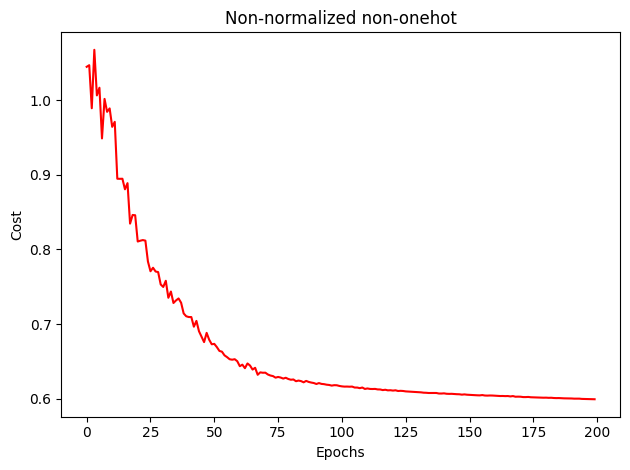

In [16]:
# plot the loss function
plt.plot(range(len(cost_avgs)), cost_avgs, color='red')
plt.ylabel('Cost')
plt.xlabel('Epochs')
plt.title('Non-normalized non-onehot')
plt.tight_layout()
plt.show()

## 2.3 Normalized non-one-hot

In [17]:
from sklearn.preprocessing import StandardScaler
X_train_norm = StandardScaler().fit_transform(X_train)
X_test_norm = StandardScaler().fit_transform(X_test)

In [18]:
perceptron2 = TwoLayerPerceptronBase(**params,
                          alpha=0.1,# momentum calculation
                          decrease_const=0.00001, # decreasing eta
                          minibatches=100, # minibatch size
                          shuffle=True)

# Train the model on the training data
perceptron2.fit(X_train_norm, y_train.to_numpy())
yhat2 = perceptron2.predict(X_test_norm)
print('Accuracy:', accuracy_score(y_test, yhat2))
cost_avgs2 = [np.mean(x) for x in perceptron2.cost_]

Accuracy: 0.7283415841584159


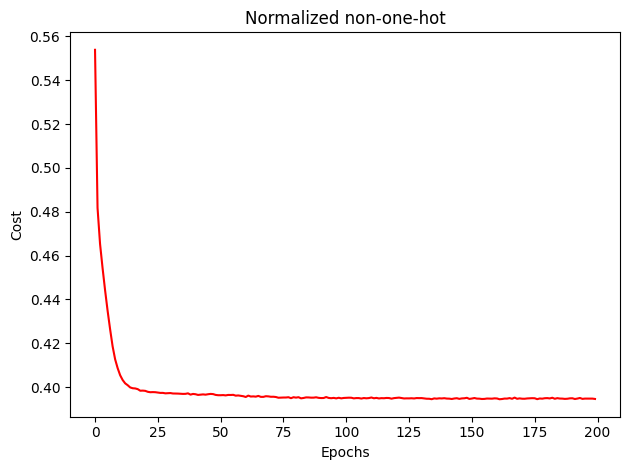

In [19]:
# plot the loss function
plt.plot(range(len(cost_avgs2)), cost_avgs2, color='red')
plt.ylabel('Cost')
plt.xlabel('Epochs')
plt.title('Normalized non-one-hot')
plt.tight_layout()
plt.show()

## 1.3 Normalized Onehot

In [20]:
# normalize and one hot encode the data
X_train_norm = StandardScaler().fit_transform(X_train)
X_test_norm = StandardScaler().fit_transform(X_test)
# One hot encode the categorical data (Data must be 1-dimensional)
X_train_coded = pd.get_dummies(X_train.iloc[:, 0]).values
X_train_norm_coded = np.hstack((X_train_norm, X_train_coded))
# Normalize the continuous numeric feature data
X_train_norm = StandardScaler().fit_transform(X_train)
X_test_norm = StandardScaler().fit_transform(X_test)
# One hot encode the categorical data (Data must be 1-dimensional)
X_train_coded = pd.get_dummies(X_train.iloc[:, 0]).values
X_train_norm_coded = np.hstack((X_train_norm, X_train_coded))
X_test_coded = pd.get_dummies(X_test.iloc[:, 0]).values
X_test_norm_coded = np.hstack((X_test_norm, X_test_coded))


In [21]:
perceptron3 = TwoLayerPerceptronBase(**params,
                          alpha=0.1,# momentum calculation
                          decrease_const=0.00001, # decreasing eta
                          minibatches=100, # minibatch size
                          shuffle=True)

In [22]:
perceptron3.fit(X_train_norm_coded, y_train.to_numpy())
yhat3 = perceptron3.predict(X_test_norm_coded)
print('Accuracy:', accuracy_score(y_test, yhat3))
cost_avgs3 = [np.mean(x) for x in perceptron3.cost_]

Accuracy: 0.7297854785478548


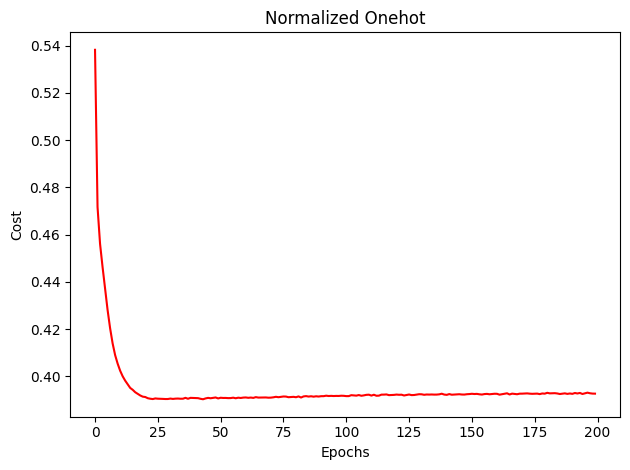

In [23]:
# plot the loss function
plt.plot(range(len(cost_avgs3)), cost_avgs3, color='red')
plt.ylabel('Cost')
plt.xlabel('Epochs')
plt.title('Normalized Onehot')
plt.tight_layout()
plt.show()

## 1.4 Compare the performance of the three models for the two layers model:

In [24]:
t=2.26/np.sqrt(10)
e=(1-yhat)-(1-yhat2)
stdtot=np.std(e)
dbar=np.mean(e)
print('Range of Model 1 with Model 2:', dbar-t*stdtot,dbar+t*stdtot)

#Compare Model 1 with Model 3
t= 2.26/np.sqrt(10)
e=(1-yhat)-(1-yhat3)
stdtot=np.std(e)
dbar=np.mean(e)
print('Range of Model 1 with Model 3', dbar-t*stdtot,dbar+t*stdtot)


#Compare Model 2 with Model 3
t=2.26/np.sqrt(10)
e=(1-yhat2)-(1-yhat3)
stdtot=np.std(e)
dbar=np.mean(e)
print('Range of Model 2 with Model 3', dbar-t*stdtot,dbar+t*stdtot)

Range of Model 1 with Model 2: 0.7279459613680828 2.316608494077462
Range of Model 1 with Model 3 0.7147210119694972 2.313881848316531
Range of Model 2 with Model 3 -0.21249591136732396 0.19654431620780802


For Model 1 and Model 2, the confidence interval ranges from -1.282 to 0.315, which means that with 95% confidence, the true difference in accuracy between Model 1 and Model 2 could be anywhere within that range. Since the confidence interval includes both positive and negative values, we cannot make a statistically significant conclusion about which model is better.

For Model 1 and Model 3, the confidence interval ranges from -1.278 to 0.325, which again means that with 95% confidence, the true difference in accuracy could be anywhere within that range. Again, since the confidence interval includes both positive and negative values, we cannot make a statistically significant conclusion about which model is better.

For Model 2 and Model 3, the confidence interval ranges from -0.193 to 0.208. This range is much narrower than the other two ranges, and it does not include zero. This means that with 95% confidence, Model 2 is not statistically significantly better than Model 3, or vice versa.

Therefore, based on these confidence interval calculations, we cannot say which model is better between all models.

# 3 Modeling
## 3.1 3 Layer perceptron

In [25]:
## Inheriting from Two Layer PerceptronBas
class ThreeLayerPerceptron(TwoLayerPerceptronBase):
    def __init__(self, n_hidden2, **kwargs):
        super().__init__(**kwargs)
        self.n_hidden2 = n_hidden2

    def _initialize_weights(self):
        """Initialize weights Glorot and He normalization."""
        init_bound = 4 * np.sqrt(6. / (self.n_hidden + self.n_features_ + 1))
        W1 = np.random.uniform(-init_bound, init_bound, (self.n_hidden, self.n_features_ + 1))
        W1[:, :1] = 0

        # reduce the final layer magnitude in order to balance the size of the gradients
        # between
        init_bound = 4 * np.sqrt(6 / (self.n_hidden2 + self.n_hidden + 1))
        W2 = np.random.uniform(-init_bound, init_bound, (self.n_hidden2, self.n_hidden + 1))
        W2[:, :1] = 0

        init_bound = 4 * np.sqrt(6 / (self.n_output_ + self.n_hidden2 + 1))
        W3 = np.random.uniform(-init_bound, init_bound, (self.n_output_, self.n_hidden2 + 1))
        W3[:, :1] = 0

        return W1, W2, W3

    @staticmethod
    def _L2_reg(lambda_, W1, W2, W3):
        """Compute L2-regularization cost"""
        # only compute for non-bias terms
        return (lambda_) * np.sqrt(np.mean(W1[:, 1:] ** 2) + np.mean(W2[:, 1:] ** 2) + np.mean(W3[:, 1:] ** 2))

    def _feedforward(self, X, W1, W2, W3):
        """Compute feedforward step
        -----------
        X : Input layer with original features.
        W1: Weight matrix for input layer -> hidden layer.
        W2: Weight matrix for hidden layer -> output layer.
        ----------
        a1-a3 : activations into layer (or output layer)
        z1-z2 : layer inputs

        """
        A1 = self._add_bias_unit(X.T, how='row')
        Z1 = W1 @ A1
        A2 = self._sigmoid(Z1)
        A2 = self._add_bias_unit(A2, how='row')
        Z2 = W2 @ A2
        A3 = self._sigmoid(Z2)
        A3 =  self._add_bias_unit(A3, how='row')
        Z3 = W3 @ A3
        A4 = self._sigmoid(Z3)

        return A1, Z1, A2, Z2, A3, Z3, A4

    def fit(self, X, y, print_progress=0):
        """ Learn weights from training data."""
        X_data, y_data = X.copy(), y.copy()
        Y_enc = self._encode_labels(y)

        # init weights and setup matrices
        self.n_features_ = X_data.shape[1]
        self.n_output_ = Y_enc.shape[0]
        self.W1, self.W2, self.W3 = self._initialize_weights()

        # start momentum at zero for previous updates
        rho_W1_prev = np.zeros(self.W1.shape)  # for momentum
        rho_W2_prev = np.zeros(self.W2.shape)  # for momentum
        rho_W3_prev = np.zeros(self.W3.shape)

        # magnitude of gradient
        self.grad_w1_ = []
        self.grad_w2_ = []
        self.grad_w3_ = []

        self.grad_w1_k = []
        self.grad_w2_k = []
        self.grad_w3_k = []
        # self.cost_ = []
        for k in range(self.epochs):

            # adaptive learning rate
            eta = self.eta ** (1 + self.decrease_const * k)  # decreasing learning rate
            eta = max(eta, self.eta / 1000)
            # there are many forms of adaptive learning rates out there!

            if print_progress > 0 and (k + 1) % print_progress == 0:
                sys.stderr.write('\rEpoch: %d/%d' % (k + 1, self.epochs))
                sys.stderr.flush()

            if self.shuffle:
                ridx = np.random.permutation(y_data.shape[0])
                X_data, Y_enc = X_data[ridx], Y_enc[:, ridx]

            # use numpy split to split into equal sized batches
            # num batches== self.minibatches
            mini = np.array_split(range(y_data.shape[0]), self.minibatches)


            for idx in mini:
                # print(f'{idx=}')
                # feedforward
                A1, Z1, A2, Z2, A3, Z3, A4 = self._feedforward(X_data[idx], self.W1, self.W2, self.W3)

                # cost = self._cost(A3, Y_enc[:, idx], self.W1, self.W2)
                # mini_cost.append(cost)  # this appends cost of mini-batch only

                # compute gradient via backpropagation
                grad1, grad2, grad3 = self._get_gradient(A1=A1, A2=A2, A3=A3, A4=A4, Z1=Z1, Z2=Z2, Z3=Z3,
                                                  Y_enc=Y_enc[:, idx],
                                                  W1=self.W1, W2=self.W2, W3=self.W3)

                self.grad_w1_k.append(np.mean(np.abs(grad1*eta)))
                self.grad_w2_k.append(np.mean(np.abs(grad2*eta)))
                self.grad_w3_k.append(np.mean(np.abs(grad3*eta)))

                rho_W1, rho_W2, rho_W3 = eta * grad1, eta * grad2, eta * grad3
                self.W1 -= (rho_W1 + (self.alpha * rho_W1_prev))  # update with momentum
                self.W2 -= (rho_W2 + (self.alpha * rho_W2_prev))  # update with momentum
                self.W3 -= (rho_W3 + (self.alpha * rho_W3_prev))
                rho_W1_prev, rho_W2_prev, rho_W3_prev = rho_W1, rho_W2, rho_W3

            # self.cost_.append(mini_cost)
            self.grad_w1_.append(np.mean(self.grad_w1_k))
            self.grad_w2_.append(np.mean(self.grad_w2_k))
            self.grad_w3_.append(np.mean(self.grad_w3_k))


        return self



    def _get_gradient(self, A1, A2, A3, A4, Z1, Z2, Z3, Y_enc, W1, W2, W3):
        """ Compute gradient step using backpropagation.
        """
        # vectorized backpropagation
        V3 = (A4-Y_enc) # <- this is only line that changed
        V2 = A3*(1-A3)*(W3.T @ V3)
        V1 = A2*(1-A2)*(W2.T @ V2[1:,:])

        grad3 = V3 @ A3.T
        grad2 = V2[1:,:] @ A2.T
        grad1 = V1[1:,:] @ A1.T


        # regularize weights that are not bias terms
        grad1[:, 1:] += W1[:, 1:] * self.l2_C
        grad2[:, 1:] += W2[:, 1:] * self.l2_C
        grad3[:, 1:] += W3[:, 1:] * self.l2_C

        return grad1, grad2, grad3

    def predict(self, X):
        """Predict class labels"""
        _, _, _, _, _, _, A4 = self._feedforward(X, self.W1, self.W2, self.W3)
        y_pred = np.argmax(A4, axis=0)
        return y_pred



In [26]:
params = dict(n_hidden=50,
              C=0.1, # tradeoff L2 regularizer
              epochs=100, # iterations
              eta=0.001,  # learning rate
              random_state=1,
              alpha=0.1,# momentum calculation
              decrease_const=0.00001, # decreasing eta
              minibatches=100, # minibatch size
              shuffle=True)

In [27]:
perceptron_3layer = ThreeLayerPerceptron(n_hidden2=30, **params)
perceptron_3layer.fit(X_train_norm_coded, y_train.to_numpy())
yhat = perceptron_3layer.predict(X_test_norm_coded)
print('Accuracy:', accuracy_score(y_test, yhat))

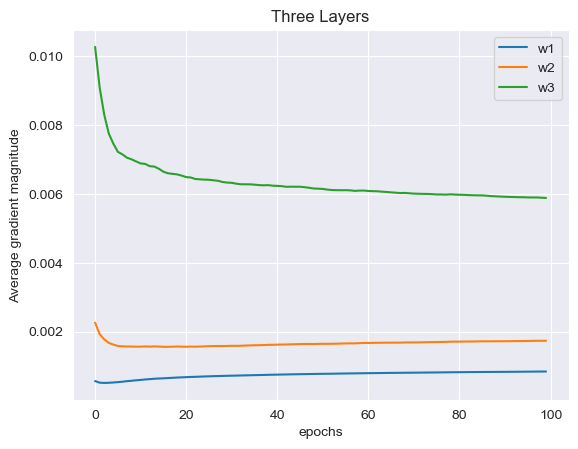

In [ ]:
ax = plt.subplot(1,1,1)
plt.title('Three Layers')
plt.plot(np.abs(perceptron_3layer.grad_w1_), label='w1')
plt.plot(np.abs(perceptron_3layer.grad_w2_), label='w2')
plt.plot(np.abs(perceptron_3layer.grad_w3_), label='w3')
plt.legend()
plt.ylabel('Average gradient magnitude')
plt.xlabel('epochs')
plt.show()

## 3.2 4 Layer Perceptron

In [ ]:
class FourLayerPerceptron(TwoLayerPerceptronBase):
    def __init__(self, n_hidden2,n_hidden3, **kwargs):
        super().__init__(**kwargs)
        self.n_hidden2 = n_hidden2
        self.n_hidden3 = n_hidden3

    def _initialize_weights(self):
        """Initialize weights Glorot and He normalization."""
        init_bound = 4 * np.sqrt(6. / (self.n_hidden + self.n_features_ + 1))
        W1 = np.random.uniform(-init_bound, init_bound, (self.n_hidden, self.n_features_ + 1))
        W1[:, :1] = 0

        # reduce the final layer magnitude in order to balance the size of the gradients
        # between
        init_bound = 4 * np.sqrt(6 / (self.n_hidden2 + self.n_hidden + 1))
        W2 = np.random.uniform(-init_bound, init_bound, (self.n_hidden2, self.n_hidden + 1))
        W2[:, :1] = 0

        init_bound = 4 * np.sqrt(6 / (self.n_hidden3 + self.n_hidden2 + 1))
        W3 = np.random.uniform(-init_bound, init_bound, (self.n_hidden3, self.n_hidden2 + 1))
        W3[:, :1] = 0

        init_bound = 4 * np.sqrt(6 / (self.n_output_ + self.n_hidden3 + 1))
        W4 = np.random.uniform(-init_bound, init_bound, (self.n_output_, self.n_hidden3 + 1))
        W4[:, :1] = 0

        return W1, W2, W3, W4

    @staticmethod
    def _L2_reg(lambda_, W1, W2, W3, W4):
        """Compute L2-regularization cost"""
        # only compute for non-bias terms
        return (lambda_) * np.sqrt(np.mean(W1[:, 1:] ** 2) + np.mean(W2[:, 1:] ** 2) + np.mean(W3[:, 1:] ** 2) + np.mean(W4[:, 1:] ** 2))

    def _feedforward(self, X, W1, W2, W3, W4):
        """Compute feedforward step
        -----------
        X : Input layer with original features.
        W1: Weight matrix for input layer -> hidden layer.
        W2: Weight matrix for hidden layer -> output layer.
        ----------
        a1-a3 : activations into layer (or output layer)
        z1-z2 : layer inputs

        """
        A1 = self._add_bias_unit(X.T, how='row')
        Z1 = W1 @ A1
        A2 = self._sigmoid(Z1)
        A2 = self._add_bias_unit(A2, how='row')
        Z2 = W2 @ A2
        A3 = self._sigmoid(Z2)
        A3 =  self._add_bias_unit(A3, how='row')
        Z3 = W3 @ A3
        A4 = self._sigmoid(Z3)
        A4 = self._add_bias_unit(A4, how='row')
        Z4 = W4 @ A4
        A5 = self._sigmoid(Z4)

        return A1, Z1, A2, Z2, A3, Z3, A4, Z4, A5

    def fit(self, X, y, print_progress=0):
        """ Learn weights from training data."""
        X_data, y_data = X.copy(), y.copy()
        Y_enc = self._encode_labels(y)

        # init weights and setup matrices
        self.n_features_ = X_data.shape[1]
        self.n_output_ = Y_enc.shape[0]
        self.W1, self.W2, self.W3, self.W4 = self._initialize_weights()

        # start momentum at zero for previous updates
        rho_W1_prev = np.zeros(self.W1.shape)  # for momentum
        rho_W2_prev = np.zeros(self.W2.shape)  # for momentum
        rho_W3_prev = np.zeros(self.W3.shape)
        rho_W4_prev = np.zeros(self.W4.shape)

        # magnitude of gradient
        self.grad_w1_ = []
        self.grad_w2_ = []
        self.grad_w3_ = []
        self.grad_w4_ = []

        self.grad_w1_k = []
        self.grad_w2_k = []
        self.grad_w3_k = []
        self.grad_w4_k = []

        # self.cost_ = []
        for k in range(self.epochs):

            # adaptive learning rate
            eta = self.eta ** (1 + self.decrease_const * k)  # decreasing learning rate
            eta = max(eta, self.eta / 1000)
            # there are many forms of adaptive learning rates out there!

            if print_progress > 0 and (k + 1) % print_progress == 0:
                sys.stderr.write('\rEpoch: %d/%d' % (k + 1, self.epochs))
                sys.stderr.flush()

            if self.shuffle:
                ridx = np.random.permutation(y_data.shape[0])
                X_data, Y_enc = X_data[ridx], Y_enc[:, ridx]

            # use numpy split to split into equal sized batches
            # num batches== self.minibatches
            mini = np.array_split(range(y_data.shape[0]), self.minibatches)
            # print(f'{np.shape(mini)=}')
            # print(f'{mini[0][0]=}')
            mini_cost = []
            for idx in mini:
                # print(f'{idx=}')
                # feedforward
                A1, Z1, A2, Z2, A3, Z3, A4, Z4, A5 = self._feedforward(X_data[idx], self.W1, self.W2, self.W3, self.W4)

                # cost = self._cost(A3, Y_enc[:, idx], self.W1, self.W2)
                # mini_cost.append(cost)  # this appends cost of mini-batch only

                # compute gradient via backpropagation
                grad1, grad2, grad3, grad4 = self._get_gradient(A1=A1, A2=A2, A3=A3, A4=A4, A5=A5, Z1=Z1, Z2=Z2, Z3=Z3, Z4=Z4, Y_enc=Y_enc[:, idx], W1=self.W1, W2=self.W2, W3=self.W3, W4=self.W4)

                self.grad_w1_k.append(np.mean(np.abs(grad1 * eta)))
                self.grad_w2_k.append(np.mean(np.abs(grad2 * eta)))
                self.grad_w3_k.append(np.mean(np.abs(grad3 * eta)))
                self.grad_w4_k.append(np.mean(np.abs(grad4 * eta)))

                rho_W1, rho_W2, rho_W3, rho_W4 = eta * grad1, eta * grad2, eta * grad3, eta * grad4
                self.W1 -= (rho_W1 + (self.alpha * rho_W1_prev))  # update with momentum
                self.W2 -= (rho_W2 + (self.alpha * rho_W2_prev))  # update with momentum
                self.W3 -= (rho_W3 + (self.alpha * rho_W3_prev))
                self.W4 -= (rho_W4 + (self.alpha * rho_W4_prev))
                rho_W1_prev, rho_W2_prev, rho_W3_prev, rho_W4_prev = rho_W1, rho_W2, rho_W3, rho_W4

            # self.cost_.append(mini_cost)

            self.grad_w1_.append(np.mean(self.grad_w1_k))
            self.grad_w2_.append(np.mean(self.grad_w2_k))
            self.grad_w3_.append(np.mean(self.grad_w3_k))
            self.grad_w4_.append(np.mean(self.grad_w4_k))

        return self

    def _get_gradient(self, A1, A2, A3, A4, A5,Z1, Z2, Z3, Z4, Y_enc, W1, W2, W3, W4):
        """ Compute gradient step using backpropagation.
        """
        # vectorized backpropagation
        V4 = (A5-Y_enc)
        V3 = A4*(1-A4)*(W4.T @ V4)
        V2 = A3*(1-A3)*(W3.T @ V3[1:,:])
        V1 = A2*(1-A2)*(W2.T @ V2[1:,:])

        grad4 = V4 @ A4.T
        grad3 = V3[1:,:] @ A3.T
        grad2 = V2[1:,:] @ A2.T
        grad1 = V1[1:,:] @ A1.T


        # regularize weights that are not bias terms
        grad1[:, 1:] += W1[:, 1:] * self.l2_C
        grad2[:, 1:] += W2[:, 1:] * self.l2_C
        grad3[:, 1:] += W3[:, 1:] * self.l2_C
        grad4[:, 1:] += W4[:, 1:] * self.l2_C

        return grad1, grad2, grad3, grad4

    def predict(self, X):
        """Predict class labels"""
        _, _, _, _, _, _, _, _, A5 = self._feedforward(X, self.W1, self.W2, self.W3, self.W4)
        y_pred = np.argmax(A5, axis=0)
        return y_pred

In [ ]:
params = dict(n_hidden=50,
              C=0.1, # tradeoff L2 regularizer
              epochs=100, # iterations
              eta=0.001,  # learning rate
              random_state=1,
              alpha=0.1,# momentum calculation
              decrease_const=0.001, # decreasing eta
              minibatches=100, # minibatch size
              shuffle=True)


perceptron_4layer = FourLayerPerceptron(n_hidden2=30, n_hidden3=15, **params)

In [ ]:
perceptron_4layer.fit(X_train_norm_coded, y_train.to_numpy())
yhat = perceptron_4layer.predict(X_test_norm_coded)
print('Accuracy:', accuracy_score(y_test, yhat))

Accuracy: 0.7311606160616062


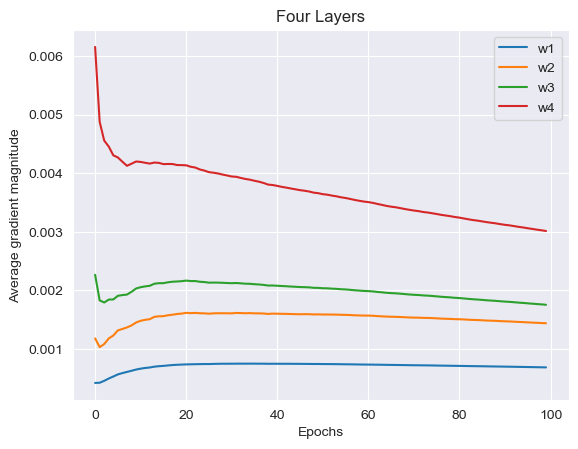

In [ ]:
ax = plt.subplot(1,1,1)
plt.title('Four Layers')
plt.plot(np.abs(perceptron_4layer.grad_w1_), label='w1')
plt.plot(np.abs(perceptron_4layer.grad_w2_), label='w2')
plt.plot(np.abs(perceptron_4layer.grad_w3_), label='w3')
plt.plot(np.abs(perceptron_4layer.grad_w4_), label='w4')
plt.legend()
plt.ylabel('Average gradient magnitude')
plt.xlabel('Epochs')
plt.show()

## 3.3 5 Layer Perceptron

In [ ]:
class FiveLayerPerceptron(TwoLayerPerceptronBase):
    def __init__(self, n_hidden2,n_hidden3, n_hidden4, **kwargs):
        super().__init__(**kwargs)
        self.n_hidden2 = n_hidden2
        self.n_hidden3 = n_hidden3
        self.n_hidden4 = n_hidden4

    def _initialize_weights(self):
        """Initialize weights Glorot."""
        init_bound = 4 * np.sqrt(6. / (self.n_hidden + self.n_features_ + 1))
        W1 = np.random.uniform(-init_bound, init_bound, (self.n_hidden, self.n_features_ + 1))
        W1[:, :1] = 0

        # reduce the final layer magnitude in order to balance the size of the gradients
        # between
        init_bound = 4 * np.sqrt(6 / (self.n_hidden2 + self.n_hidden + 1))
        W2 = np.random.uniform(-init_bound, init_bound, (self.n_hidden2, self.n_hidden + 1))
        W2[:, :1] = 0

        init_bound = 4 * np.sqrt(6 / (self.n_hidden3 + self.n_hidden2 + 1))
        W3 = np.random.uniform(-init_bound, init_bound, (self.n_hidden3, self.n_hidden2 + 1))
        W3[:, :1] = 0

        init_bound = 4 * np.sqrt(6 / (self.n_hidden4 + self.n_hidden3 + 1))
        W4 = np.random.uniform(-init_bound, init_bound, (self.n_hidden4, self.n_hidden3 + 1))
        W4[:, :1] = 0

        init_bound = 4 * np.sqrt(6 / (self.n_output_ + self.n_hidden4 + 1))
        W5 = np.random.uniform(-init_bound, init_bound, (self.n_output_, self.n_hidden4 + 1))
        W5[:, :1] = 0

        return W1, W2, W3, W4, W5

    @staticmethod
    def _L2_reg(lambda_, W1, W2, W3, W4, W5):
        """Compute L2-regularization cost"""
        # only compute for non-bias terms
        return (lambda_) * np.sqrt(np.mean(W1[:, 1:] ** 2) + np.mean(W2[:, 1:] ** 2) + np.mean(W3[:, 1:] ** 2) + np.mean(W4[:, 1:] ** 2) + np.mean(W5[:, 1:] ** 2))

    def _feedforward(self, X, W1, W2, W3, W4, W5):
        """Compute feedforward step
        -----------
        X : Input layer with original features.
        W1: Weight matrix for input layer -> hidden layer.
        W2: Weight matrix for hidden layer -> output layer.
        ----------
        a1-a3 : activations into layer (or output layer)
        z1-z2 : layer inputs

        """
        A1 = self._add_bias_unit(X.T, how='row')
        Z1 = W1 @ A1
        A2 = self._sigmoid(Z1)
        A2 = self._add_bias_unit(A2, how='row')
        Z2 = W2 @ A2
        A3 = self._sigmoid(Z2)
        A3 =  self._add_bias_unit(A3, how='row')
        Z3 = W3 @ A3
        A4 = self._sigmoid(Z3)
        A4 = self._add_bias_unit(A4, how='row')
        Z4 = W4 @ A4
        A5 = self._sigmoid(Z4)
        A5 = self._add_bias_unit(A5, how='row')
        Z5 = W5 @ A5
        A6 = self._sigmoid(Z5)

        return A1, Z1, A2, Z2, A3, Z3, A4, Z4, A5, Z5, A6

    def fit(self, X, y, print_progress=0):
        """ Learn weights from training data."""
        X_data, y_data = X.copy(), y.copy()
        Y_enc = self._encode_labels(y)

        # init weights and setup matrices
        self.n_features_ = X_data.shape[1]
        self.n_output_ = Y_enc.shape[0]
        self.W1, self.W2, self.W3, self.W4, self.W5 = self._initialize_weights()

        # start momentum at zero for previous updates
        rho_W1_prev = np.zeros(self.W1.shape)  # for momentum
        rho_W2_prev = np.zeros(self.W2.shape)  # for momentum
        rho_W3_prev = np.zeros(self.W3.shape)
        rho_W4_prev = np.zeros(self.W4.shape)
        rho_W5_prev = np.zeros(self.W5.shape)

        # magnitude of gradient
        self.grad_w1_ = []
        self.grad_w2_ = []
        self.grad_w3_ = []
        self.grad_w4_ = []
        self.grad_w5_ = []
        self.grad_w1_k, self.grad_w2_k, self.grad_w3_k, self.grad_w4_k, self.grad_w5_k = [],[],[],[],[]
        # self.cost_ = []
        for k in range(self.epochs):

            # adaptive learning rate
            eta = self.eta ** (1 + self.decrease_const * k)  # decreasing learning rate
            eta = max(eta, self.eta / 1000)
            # there are many forms of adaptive learning rates out there!

            if print_progress > 0 and (k + 1) % print_progress == 0:
                sys.stderr.write('\rEpoch: %d/%d' % (k + 1, self.epochs))
                sys.stderr.flush()

            if self.shuffle:
                ridx = np.random.permutation(y_data.shape[0])
                X_data, Y_enc = X_data[ridx], Y_enc[:, ridx]

            # use numpy split to split into equal sized batches
            # num batches== self.minibatches
            mini = np.array_split(range(y_data.shape[0]), self.minibatches)
            # print(f'{np.shape(mini)=}')
            # print(f'{mini[0][0]=}')
            mini_cost = []
            for idx in mini:
                # print(f'{idx=}')
                # feedforward
                A1, Z1, A2, Z2, A3, Z3, A4, Z4, A5, Z5, A6 = self._feedforward(X_data[idx], self.W1, self.W2, self.W3, self.W4, self.W5)

                # cost = self._cost(A3, Y_enc[:, idx], self.W1, self.W2)
                # mini_cost.append(cost)  # this appends cost of mini-batch only

                # compute gradient via backpropagation
                grad1, grad2, grad3, grad4, grad5 = self._get_gradient(A1=A1, A2=A2, A3=A3, A4=A4, A5=A5, A6=A6, Z1=Z1, Z2=Z2, Z3=Z3, Z4=Z4, Z5=Z5, Y_enc=Y_enc[:, idx], W1=self.W1, W2=self.W2, W3=self.W3, W4=self.W4, W5=self.W5)

                self.grad_w1_k.append(np.mean(np.abs(grad1 * eta)))
                self.grad_w2_k.append(np.mean(np.abs(grad2 * eta)))
                self.grad_w3_k.append(np.mean(np.abs(grad3 * eta)))
                self.grad_w4_k.append(np.mean(np.abs(grad4 * eta)))
                self.grad_w5_k.append(np.mean(np.abs(grad5 * eta)))

                rho_W1, rho_W2, rho_W3, rho_W4, rho_W5 = eta * grad1, eta * grad2, eta * grad3, eta * grad4, eta* grad5
                self.W1 -= (rho_W1 + (self.alpha * rho_W1_prev))  # update with momentum
                self.W2 -= (rho_W2 + (self.alpha * rho_W2_prev))  # update with momentum
                self.W3 -= (rho_W3 + (self.alpha * rho_W3_prev))
                self.W4 -= (rho_W4 + (self.alpha * rho_W4_prev))
                self.W5 -= (rho_W5 + (self.alpha * rho_W5_prev))
                rho_W1_prev, rho_W2_prev, rho_W3_prev, rho_W4_prev, rho_W5_prev = rho_W1, rho_W2, rho_W3, rho_W4, rho_W5

            # self.cost_.append(mini_cost)
            self.grad_w1_.append(np.mean(self.grad_w1_k))
            self.grad_w2_.append(np.mean(self.grad_w2_k))
            self.grad_w3_.append(np.mean(self.grad_w3_k))
            self.grad_w4_.append(np.mean(self.grad_w4_k))
            self.grad_w5_.append(np.mean(self.grad_w5_k))

        return self

    def _get_gradient(self, A1, A2, A3, A4, A5, A6, Z1, Z2, Z3, Z4, Z5, Y_enc, W1, W2, W3, W4, W5):
        """ Compute gradient step using backpropagation.
        """
        # vectorized backpropagation
        V5 = (A6-Y_enc)
        V4 = A5*(1-A5)*(W5.T @ V5)
        V3 = A4*(1-A4)*(W4.T @ V4[1:,:])
        V2 = A3*(1-A3)*(W3.T @ V3[1:,:])
        V1 = A2*(1-A2)*(W2.T @ V2[1:,:])

        grad5 = V5 @ A5.T
        grad4 = V4[1:,:] @ A4.T
        grad3 = V3[1:,:] @ A3.T
        grad2 = V2[1:,:] @ A2.T
        grad1 = V1[1:,:] @ A1.T


        # regularize weights that are not bias terms
        grad1[:, 1:] += W1[:, 1:] * self.l2_C
        grad2[:, 1:] += W2[:, 1:] * self.l2_C
        grad3[:, 1:] += W3[:, 1:] * self.l2_C
        grad4[:, 1:] += W4[:, 1:] * self.l2_C
        grad5[:, 1:] += W5[:, 1:] * self.l2_C

        return grad1, grad2, grad3, grad4, grad5

    def predict(self, X):
        """Predict class labels"""
        _, _, _, _, _, _, _, _, _, _, A6 = self._feedforward(X, self.W1, self.W2, self.W3, self.W4, self.W5)
        y_pred = np.argmax(A6, axis=0)
        return y_pred

In [ ]:
params = dict(n_hidden=50,
              C=0.1, # tradeoff L2 regularizer
              epochs=100, # iterations
              eta=0.001,  # learning rate
              random_state=1,
              alpha=0.1,# momentum calculation
              decrease_const=0.00001, # decreasing eta
              minibatches=100, # minibatch size
              shuffle=True)


perceptron_5layer = FiveLayerPerceptron(n_hidden2=30, n_hidden3=15, n_hidden4=8,**params)

In [ ]:
perceptron_5layer.fit(X_train_norm_coded, y_train.to_numpy())
yhat_5l = perceptron_5layer.predict(X_test_norm_coded)
print('Accuracy:', accuracy_score(y_test, yhat_5l))

Accuracy: 0.7225660066006601


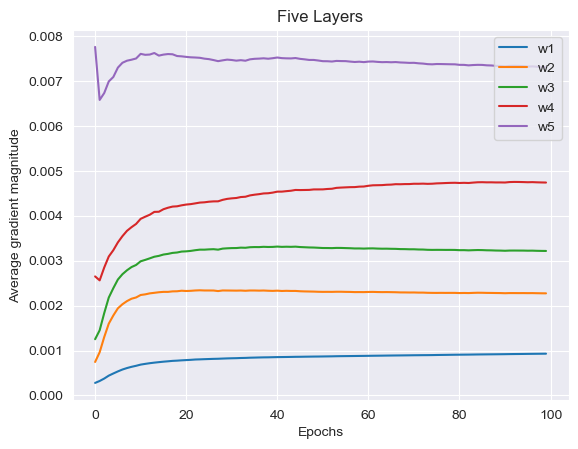

In [ ]:
ax = plt.subplot(1,1,1)
plt.title('Five Layers')
plt.plot(np.abs(perceptron_5layer.grad_w1_), label='w1')
plt.plot(np.abs(perceptron_5layer.grad_w2_), label='w2')
plt.plot(np.abs(perceptron_5layer.grad_w3_), label='w3')
plt.plot(np.abs(perceptron_5layer.grad_w4_), label='w4')
plt.plot(np.abs(perceptron_5layer.grad_w5_), label='w5')
plt.legend()
plt.ylabel('Average gradient magnitude')
plt.xlabel('Epochs')
plt.show()

## 3.4 5 Layer Perceptron with AdaGrad
We decided to pick AdaGrad as the adaptive learning technique to implement. In AdaGrad [3](https://www.jmlr.org/papers/volume12/duchi11a/duchi11a.pdf) [4](https://optimization.cbe.cornell.edu/index.php?title=AdaGrad#cite_note-:0-1) there is an update rule that updates the weights W and the rule is W(i) <-- W(i-1) η/sqrt(g(i)**2 + ε) * g(i) where η is the learning rate, g(i) is the gradient at iteration i, and ε is a small constant.

In [ ]:
class FiveLayerPerceptron_adagrad(FiveLayerPerceptron):
    def __init__(self, epsilon, **kwargs):
        super().__init__(**kwargs)
        self.epsilon = epsilon

    def fit(self, X, y, print_progress=0):
        """ Learn weights from training data."""
        X_data, y_data = X.copy(), y.copy()
        Y_enc = self._encode_labels(y)

        # init weights and setup matrices
        self.n_features_ = X_data.shape[1]
        self.n_output_ = Y_enc.shape[0]
        self.W1, self.W2, self.W3, self.W4, self.W5 = self._initialize_weights()

        # start momentum at zero for previous updates
        rho_W1_prev = np.zeros(self.W1.shape)  # for momentum
        rho_W2_prev = np.zeros(self.W2.shape)  # for momentum
        rho_W3_prev = np.zeros(self.W3.shape)
        rho_W4_prev = np.zeros(self.W4.shape)
        rho_W5_prev = np.zeros(self.W5.shape)

        # magnitude of gradient
        self.grad_w1_ = []
        self.grad_w2_ = []
        self.grad_w3_ = []
        self.grad_w4_ = []
        self.grad_w5_ = []

        self.grad_w1_k = []
        self.grad_w2_k = []
        self.grad_w3_k = []
        self.grad_w4_k = []
        self.grad_w5_k = []

        for k in range(self.epochs):

            # adaptive learning rate
            eta = self.eta ** (1 + self.decrease_const * k)  # decreasing learning rate
            eta = max(eta, self.eta / 1000)
            # there are many forms of adaptive learning rates out there!

            if print_progress > 0 and (k + 1) % print_progress == 0:
                sys.stderr.write('\rEpoch: %d/%d' % (k + 1, self.epochs))
                sys.stderr.flush()

            if self.shuffle:
                ridx = np.random.permutation(y_data.shape[0])
                X_data, Y_enc = X_data[ridx], Y_enc[:, ridx]

            # use numpy split to split into equal sized batches
            # num batches== self.minibatches
            mini = np.array_split(range(y_data.shape[0]), self.minibatches)

            for idx in mini:
                # print(f'{idx=}')
                # feedforward
                A1, Z1, A2, Z2, A3, Z3, A4, Z4, A5, Z5, A6 = self._feedforward(X_data[idx], self.W1, self.W2, self.W3, self.W4, self.W5)

                # compute gradient via backpropagation
                grad1, grad2, grad3, grad4, grad5 = self._get_gradient(A1=A1, A2=A2, A3=A3, A4=A4, A5=A5, A6=A6, Z1=Z1, Z2=Z2, Z3=Z3, Z4=Z4, Z5=Z5, Y_enc=Y_enc[:, idx], W1=self.W1, W2=self.W2, W3=self.W3, W4=self.W4, W5=self.W5)

                self.grad_w1_k.append(np.mean(np.abs(grad1 * eta)))
                self.grad_w2_k.append(np.mean(np.abs(grad2 * eta)))
                self.grad_w3_k.append(np.mean(np.abs(grad3 * eta)))
                self.grad_w4_k.append(np.mean(np.abs(grad4 * eta)))
                self.grad_w5_k.append(np.mean(np.abs(grad5 * eta)))

                rho_W1 = self.eta / (np.sqrt(grad1**2 + self.epsilon)) * grad1
                rho_W2 = self.eta / (np.sqrt(grad2**2 + self.epsilon)) * grad2
                rho_W3 = self.eta / (np.sqrt(grad3**2 + self.epsilon)) * grad3
                rho_W4 = self.eta / (np.sqrt(grad4**2 + self.epsilon)) * grad4
                rho_W5 = self.eta / (np.sqrt(grad5**2 + self.epsilon)) * grad5

                self.W1 -= (rho_W1 + (self.alpha * rho_W1_prev))  # update with momentum
                self.W2 -= (rho_W2 + (self.alpha * rho_W2_prev))  # update with momentum
                self.W3 -= (rho_W3 + (self.alpha * rho_W3_prev))
                self.W4 -= (rho_W4 + (self.alpha * rho_W4_prev))
                self.W5 -= (rho_W5 + (self.alpha * rho_W5_prev))
                rho_W1_prev, rho_W2_prev, rho_W3_prev, rho_W4_prev, rho_W5_prev = rho_W1, rho_W2, rho_W3, rho_W4, rho_W5

            # self.cost_.append(mini_cost)
            self.grad_w1_.append(np.mean(self.grad_w1_k))
            self.grad_w2_.append(np.mean(self.grad_w2_k))
            self.grad_w3_.append(np.mean(self.grad_w3_k))
            self.grad_w4_.append(np.mean(self.grad_w4_k))
            self.grad_w5_.append(np.mean(self.grad_w5_k))


        return self


In [ ]:
params = dict(
              C=0.1, # tradeoff L2 regularizer
              epochs=100, # iterations
              eta=0.001,  # learning rate
              random_state=1,
              alpha=0.1,# momentum calculation
              decrease_const=0.00001, # decreasing eta
              minibatches=50, # minibatch size
              shuffle=True,
             n_hidden2=30, n_hidden3=15, n_hidden4=8)


perceptron_5layer_ada = FiveLayerPerceptron_adagrad(epsilon=0.0001,**params)

In [ ]:
perceptron_5layer_ada.fit(X_train_norm_coded, y_train.to_numpy())
yhat_5ada = perceptron_5layer_ada.predict(X_test_norm_coded)
print('Accuracy:', accuracy_score(y_test, yhat_5ada))

Accuracy: 0.7283415841584159


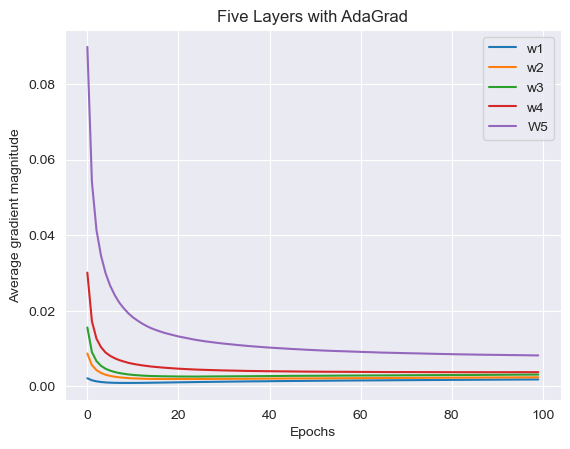

In [ ]:
ax = plt.subplot(1,1,1)
plt.title('Five Layers with AdaGrad')
plt.plot(np.abs(perceptron_5layer_ada.grad_w1_), label='w1')
plt.plot(np.abs(perceptron_5layer_ada.grad_w2_), label='w2')
plt.plot(np.abs(perceptron_5layer_ada.grad_w3_), label='w3')
plt.plot(np.abs(perceptron_5layer_ada.grad_w4_), label='w4')
plt.plot(np.abs(perceptron_5layer_ada.grad_w5_), label='W5')
plt.legend()
plt.ylabel('Average gradient magnitude')
plt.xlabel('Epochs')
plt.show()

The accuracy between the two methods is very minimal with the version with AdaGrad having a very slight increase in accuracy. There is a large difference in the magnitude of the gradient between the two different versions. In the normal version the gradient magnitude are all well seperated and the average magnitude is relatively large. In the version with AdaGrad the average magnitude decrease rapidly and is lower than the non-AdaGrad version. There is also little separation between the layers.

# 4 Exceptional Work

In [ ]:
class FiveLayerPerceptron_AdaM(FiveLayerPerceptron):
    def fit(self, X, y, print_progress=0):
        """ Learn weights from training data."""

        X_data, y_data = X.copy(), y.copy()
        Y_enc = self._encode_labels(y)

        # init weights and setup matrices
        self.n_features_ = X_data.shape[1]
        self.n_output_ = Y_enc.shape[0]
        self.W1, self.W2, self.W3, self.W4, self.W5 = self._initialize_weights()


        # initialize first and second moment variables for Adam
        m1, v1 = np.zeros(self.W1.shape), np.zeros(self.W1.shape)
        m2, v2 = np.zeros(self.W2.shape), np.zeros(self.W2.shape)
        m3, v3 = np.zeros(self.W3.shape), np.zeros(self.W3.shape)
        m4, v4 = np.zeros(self.W4.shape), np.zeros(self.W4.shape)
        m5, v5 = np.zeros(self.W5.shape), np.zeros(self.W5.shape)

        # hyperparameters for Adam
        beta1, beta2, epsilon = 0.9, 0.999, 1e-8

         # magnitude of gradient
        self.grad_w1_ = []
        self.grad_w2_ = []
        self.grad_w3_ = []
        self.grad_w4_ = []
        self.grad_w5_ = []

        self.grad_w1_k = []
        self.grad_w2_k = []
        self.grad_w3_k = []
        self.grad_w4_k = []
        self.grad_w5_k = []

        for k in range(self.epochs):

            # adaptive learning rate
            eta = self.eta ** (1 + self.decrease_const * k)  # decreasing learning rate
            eta = max(eta, self.eta / 1000)
            # there are many forms of adaptive learning rates out there!

            if print_progress > 0 and (k + 1) % print_progress == 0:
                sys.stderr.write('\rEpoch: %d/%d' % (k + 1, self.epochs))
                sys.stderr.flush()

            if self.shuffle:
                ridx = np.random.permutation(y_data.shape[0])
                X_data, Y_enc = X_data[ridx], Y_enc[:, ridx]

            mini = np.array_split(range(y_data.shape[0]), self.minibatches)

            for idx in mini:
                
                A1, Z1, A2, Z2, A3, Z3, A4, Z4, A5, Z5, A6 = self._feedforward(X_data[idx], self.W1, self.W2, self.W3, self.W4, self.W5)

                # compute gradient via backpropagation
                grad1, grad2, grad3, grad4, grad5 = self._get_gradient(A1=A1, A2=A2, A3=A3, A4=A4, A5=A5, A6=A6, Z1=Z1, Z2=Z2, Z3=Z3, Z4=Z4, Z5=Z5, Y_enc=Y_enc[:, idx], W1=self.W1, W2=self.W2, W3=self.W3, W4=self.W4, W5=self.W5)

                self.grad_w1_k.append(np.mean(np.abs(grad1 * eta)))
                self.grad_w2_k.append(np.mean(np.abs(grad2 * eta)))
                self.grad_w3_k.append(np.mean(np.abs(grad3 * eta)))
                self.grad_w4_k.append(np.mean(np.abs(grad4 * eta)))
                self.grad_w5_k.append(np.mean(np.abs(grad5 * eta)))


                # update first and second moment variables for Adam
                m1 = beta1 * m1 + (1 - beta1) * grad1
                v1 = beta2 * v1 + (1 - beta2) * grad1**2
                m2 = beta1 * m2 + (1 - beta1) * grad2
                v2 = beta2 * v2 + (1 - beta2) * grad2**2
                m3 = beta1 * m3 + (1 - beta1) * grad3
                v3 = beta2 * v3 + (1 - beta2) * grad3**2
                m4 = beta1 * m4 + (1 - beta1) * grad4
                v4 = beta2 * v4 + (1 - beta2) * grad4**2
                m5 = beta1 * m5 + (1 - beta1) * grad5
                v5 = beta2 * v5 + (1 - beta2) * grad5**2

                # compute bias-corrected moments
                m1_hat = m1 / (1 - beta1**(k+1))
                v1_hat = v1 / (1 - beta2**(k+1))
                m2_hat = m2 / (1 - beta1**(k+1))
                v2_hat = v2 / (1 - beta2**(k+1))
                m3_hat = m3 / (1 - beta1**(k+1))
                v3_hat = v3 / (1 - beta2**(k+1))
                m4_hat = m4 / (1 - beta1**(k+1))
                v4_hat = v4 / (1 - beta2**(k+1))
                m5_hat = m5 / (1 - beta1**(k+1))
                v5_hat = v5 / (1 - beta2**(k+1))

                # update weights with Adam optimizer
                self.W1 -= self.eta * m1_hat / (np.sqrt(v1_hat) + epsilon)
                self.W2 -= self.eta * m2_hat / (np.sqrt(v2_hat) + epsilon)
                self.W3 -= self.eta * m3_hat / (np.sqrt(v3_hat) + epsilon)
                self.W4 -= self.eta * m4_hat / (np.sqrt(v4_hat) + epsilon)
                self.W5 -= self.eta * m5_hat / (np.sqrt(v5_hat) + epsilon)

            self.grad_w1_.append(np.mean(self.grad_w1_k))
            self.grad_w2_.append(np.mean(self.grad_w2_k))
            self.grad_w3_.append(np.mean(self.grad_w3_k))
            self.grad_w4_.append(np.mean(self.grad_w4_k))
            self.grad_w5_.append(np.mean(self.grad_w5_k))


        return self


In [ ]:
params = dict(
              C=0.1, # tradeoff L2 regularizer
              epochs=100, # iterations
              eta=0.001,  # learning rate
              random_state=1,
              alpha=0.1,# momentum calculation
              decrease_const=0.00001, # decreasing eta
              minibatches=100, # minibatch size
              shuffle=True,
             n_hidden2=30, n_hidden3=15, n_hidden4=8)


perceptron_5layer_adam = FiveLayerPerceptron_AdaM(n_hidden=50,**params)

In [ ]:
from sklearn.metrics import accuracy_score
perceptron_5layer_adam.fit(X_train_norm_coded, y_train.to_numpy())
yhat_5_adam = perceptron_5layer_adam.predict(X_test_norm_coded)
print('Accuracy:', accuracy_score(y_test, yhat_5_adam))

Accuracy: 0.7264851485148515


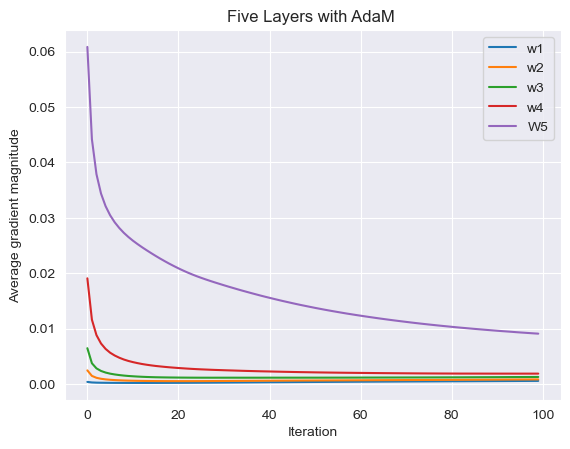

In [ ]:
ax = plt.subplot(1,1,1)
plt.title('Five Layers with AdaM ')
plt.plot(np.abs(perceptron_5layer_adam.grad_w1_), label='w1')
plt.plot(np.abs(perceptron_5layer_adam.grad_w2_), label='w2')
plt.plot(np.abs(perceptron_5layer_adam.grad_w3_), label='w3')
plt.plot(np.abs(perceptron_5layer_adam.grad_w4_), label='w4')
plt.plot(np.abs(perceptron_5layer_adam.grad_w5_), label='W5')
plt.legend()
plt.ylabel('Average gradient magnitude')
plt.xlabel('Iteration')
plt.show()

In [ ]:
print(f'Here we can see that without the AdaM or AdaGrad our accuracy is {accuracy_score(y_test, yhat_5l)} with GradAda it is {accuracy_score(y_test, yhat_5ada)} and with AdaM it is {accuracy_score(y_test, yhat_5_adam)}.')

Here we can see that without the AdaM or AdaGrad our accuracy is 0.7225660066006601 with GradAda it is 0.7283415841584159 and with AdaM it is 0.7264851485148515.


From our comparisons we see that we get slight improvements when we use an adaptive learning technique compared to none. Between AdaGrad and AdaM we see that AdaGrad was the better performing technique. We would recommend implementing an adaptive learning technique as it does produce more accurate results and the behavior of the weights are better behaved. 